In [5]:
# Import dependencies
import findspark
from pyspark import SparkFiles
from pyspark.sql import SparkSession
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import pandas as pd
import tensorflow as tf
import pandas as pd

In [6]:
# Initialize findspark
findspark.init()

# Initialize the spark session
spark = SparkSession.builder.appName("SK_model").getOrCreate()

In [7]:
# Load in the pre-processed data
df = spark.read.csv("../Resources/filtered_encoded_dataset.csv", sep=",", header=True, inferSchema=True)
df.show()

+-----------------+--------------------+----------+--------+------------+------+--------+----+-----------+------------+----------------+--------+-------+-------+------------------+----------------+----------------+----------------+----------------+----------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+
|   primary_artist|          track_name|popularity|explicit|danceability|energy|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|      duration_min|time_signature_0|time_signature_1|time_signature_3|time_signature_4|time_signature_5|key_0|key_1|key_2|key_3|key_4|key_5|key_6|key_7|key_8|key_9|key_10|key_11|num_artists_binned_1|num_artists_binned_2|num_artists_binned_3|num_artists_binned_4|num_artists_b

In [8]:
# Remove primary_artist and track_name from the dataset
df = df.drop("primary_artist", "track_name")
df.show()

+----------+--------+------------+------+--------+----+-----------+------------+----------------+--------+-------+-------+------------------+----------------+----------------+----------------+----------------+----------------+-----+-----+-----+-----+-----+-----+-----+-----+-----+-----+------+------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------+-------------+-------------+-------------+-------------+-------------+-------------+
|popularity|explicit|danceability|energy|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|  tempo|      duration_min|time_signature_0|time_signature_1|time_signature_3|time_signature_4|time_signature_5|key_0|key_1|key_2|key_3|key_4|key_5|key_6|key_7|key_8|key_9|key_10|key_11|num_artists_binned_1|num_artists_binned_2|num_artists_binned_3|num_artists_binned_4|num_artists_binned_5|num_artists_binned_6|track_genre_0|track_genre_1|track_genre_2|track_g

In [11]:
# Convert the data to a pandas Dataframe
p_df = df.toPandas()
p_df.head()

,popularity,explicit,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,num_artists_binned_4,num_artists_binned_5,num_artists_binned_6,track_genre_0,track_genre_1,track_genre_2,track_genre_3,track_genre_4,track_genre_5,track_genre_6
0,73,0,0.676,0.4610,-6.746,0,0.1430,0.0322,0.000001,0.3580,...,0,0,0,0,0,0,0,0,0,1
1,55,0,0.420,0.1660,-17.235,1,0.0763,0.9240,0.000006,0.1010,...,0,0,0,0,0,0,0,0,0,1
2,57,0,0.438,0.3590,-9.734,1,0.0557,0.2100,0.000000,0.1170,...,0,0,0,0,0,0,0,0,0,1
3,71,0,0.266,0.0596,-18.515,1,0.0363,0.9050,0.000071,0.1320,...,0,0,0,0,0,0,0,0,0,1
4,82,0,0.618,0.4430,-9.681,1,0.0526,0.4690,0.000000,0.0829,...,0,0,0,0,0,0,0,0,0,1


array([[<AxesSubplot:title={'center':'popularity'}>]], dtype=object)

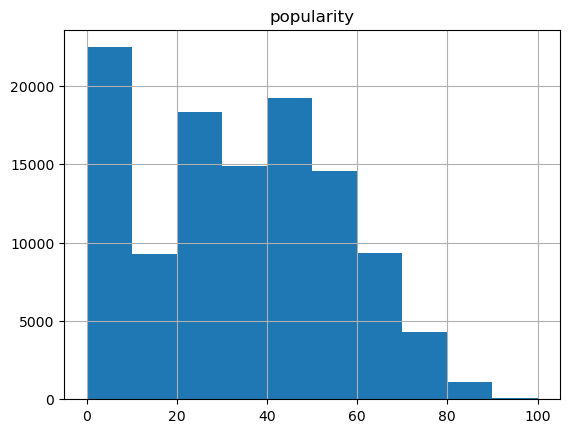

In [10]:
# Bin the popularity so it can be predicted (high/ medium/ low)
## Check a histogram of popularity
p_df.hist(column='popularity')

In [40]:
# Separate the prediction (song popularity) from the rest of the features
y = p_df.popularity.values
X = p_df.drop(columns="popularity")

# Split the training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.